Nama: Nabilah Qurratul Annisa

NPM : 2108107010010

# Jenis Dataset
Dataset ini bersumber dari kaggle.
https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset

Experience Salary Dataset berisi informasi tentang hubungan antara pengalaman kerja (dalam bulan) dan gaji bulanan yang terkait (dalam ribuan dolar) karyawan di berbagai industri.

Pada dataset ini terdapat atribut yaitu:

*   exp(in months)  
*   salary(in thousands)

# Studi Kasus

Model ini dibangun untuk memprediksi gaji berdasarkan pengalaman.


# Mengimport Library dan Membaca Data

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# import and split the data and classes
dataset = pd.read_csv('Experience_Salary.csv')

print(dataset)

     exp(in months)  salary(in thousands)
0         18.290293             16.521825
1         17.023407             11.666234
2         26.343613             23.167255
3         19.105834             20.877145
4         27.742516             23.166236
..              ...                   ...
995       22.161741             24.666502
996       32.266497             24.160270
997       17.039030             19.903797
998       25.222124             21.974413
999       16.418028             19.634787

[1000 rows x 2 columns]


# Preprocessing Data

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [38]:
# Mengecek missing value
dataset.isna().sum()

exp(in months)          0
salary(in thousands)    0
dtype: int64

In [39]:
print(dataset.duplicated().sum())

0


In [40]:
dataset.corr()

,exp(in months),salary(in thousands)
exp(in months),1.000000,0.810969
salary(in thousands),0.810969,1.000000


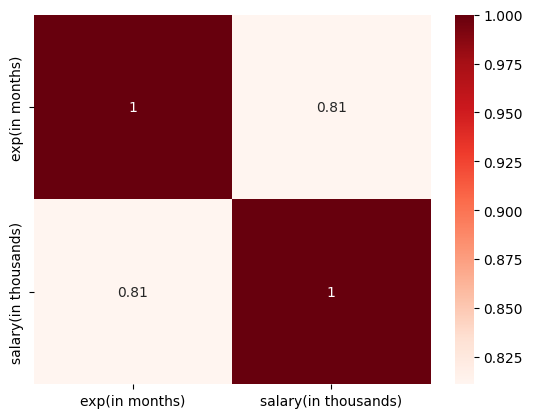

In [41]:
# Menampilkan korelasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True, cmap='Reds')
plt.show()

# Split Data

In [44]:
X = dataset.iloc[:, 0:-1].values  # Reshape to keep X as a 2D array
Y = dataset.iloc[:, 1].values

In [45]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(np.reshape(Y, (len(Y), 1)))

# Membangun Model

In [46]:
# Fitting Regression model to the dataset
from sklearn.svm import SVR
regressor = SVR() # add this parametre kernel='rbf'
regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [47]:
# predicts a new result with polyn reg
y_pred = regressor.predict(sc_X.transform(np.array([[8.5]])))

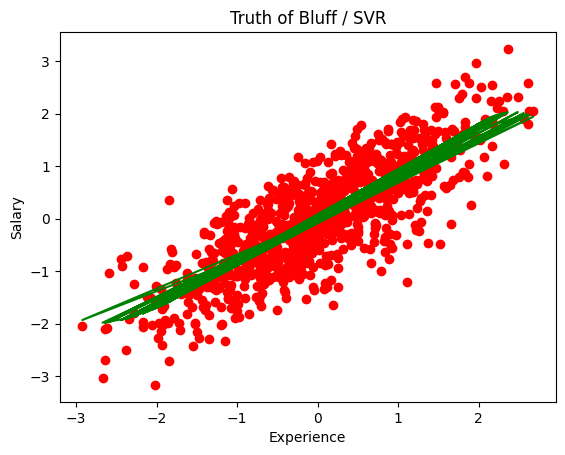

In [48]:
# Visualisation the regression result
plt.scatter(x=X, y=Y,color='red')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth of Bluff / SVR')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [50]:
# Fitting Regression model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='sigmoid')
regressor.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

In [51]:
# Predicts a new result with sigmoid kernel
new_data = np.array([8.5]).reshape(-1, 1)
y_pred = regressor.predict(sc_X.transform(new_data))
y_pred = sc_Y.inverse_transform(y_pred.reshape(-1, 1))

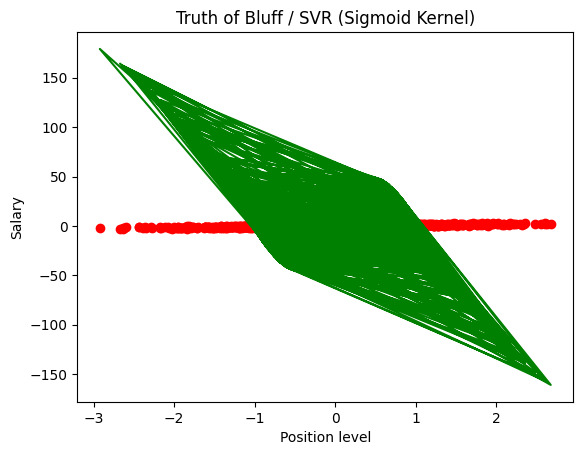

In [52]:
# Visualisation the regression result
plt.scatter(x=X, y=Y, color='red')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth of Bluff / SVR (Sigmoid Kernel)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Kesimpulan**

Hubungan antara gaji dan pengalaman kerja dalam hasil gambar visualisasi tersebut menunjukkan bahwa gaji dan pengalaman kerja memiliki hubungan positif. Hal ini terlihat dari pola scatter plot yang menunjukkan bahwa gaji cenderung meningkat seiring dengan bertambahnya pengalaman kerja.